<a href="https://colab.research.google.com/github/m4nko/TT050-MineracaoDeTexto/blob/main/CaseStudyNPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de linguagem natural (PLN) 

## Introdução


Considerando os dados que contém análises de usuários para muitos produtos, [disponível no Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews), vamos concentrar no produto do conjunto de dados que teve mais análises - um cookie de aveia.





In [ ]:
import nltk
#nltk.download()  #<-- Run this if it's your first time using nltk to download all of the datasets and models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data = pd.read_csv('sample_data/cookie_reviews.csv')
data.head()

NameError: ignored

## Conhecendo os dados ##

* Determine quantas revisões há no total.
* Determine a porcentagem de revisões por estrela 1, 2, 3, 4, 5.
* Determine a distribuição do número de caracteres das revisões. Listando os valores  plotando o histograma.

In [ ]:
# Número de revisões
len(data)

913

In [ ]:
# Porcentagem de revisões por estrela
data.stars.value_counts(normalize=True)

5    0.683461
4    0.237678
3    0.061336
2    0.013143
1    0.004381
Name: stars, dtype: float64

In [ ]:
# Número de caracteres x número de revisões 
data.reviews.map(len).value_counts().head()

134    10
157     9
137     8
107     8
132     8
Name: reviews, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

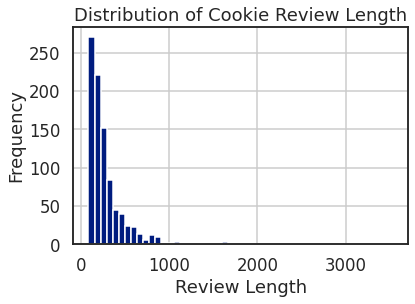

In [ ]:
# Histograma dos tamanhos das revisões em caractere
ax = data.reviews.map(len).hist(bins=50)
ax.set(xlabel='Tam. Revisão', ylabel='Frequencia', title='Histograma de tamanho de revisão');

## Pré-processamento ##

* Aplicando as seguintes etapas de pré-processamento:

     1. Remova as palavras que contém números
     2. Torne todo texto minusculo
     3. Remova pontuação
     4. Tokenize as revisões em palavras
     
     
* Encontre as palavras mais comuns.
* Determine a distribuição do tamanho das palavras no corpus.

In [ ]:
# Vamos ver como são os dados
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


In [ ]:
# Exemplo de uma revisão
data.iloc[1,2]

'Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn\'t feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and conta

In [ ]:
# A expressão regular abaixo remove toda palavra com número e torna as palavras minusculas
import re

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
data['reviews'] = data.reviews.map(lower_alpha)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these. i was very pleased to giv...


In [ ]:
# Removendo as pontuações
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
data['reviews'] = data.reviews.map(punc_re)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...


In [ ]:
# Revisão após alguns pré-processamentos de limpeza
data.iloc[1,2]

'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example  br    br     at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day  br    br     the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at      br    br     the following night  after dinner  i had one with the remainder of my glass of wine   delicious   and again  didn t feel the need to snack later in the evening  br    br   each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old fashioned  homemade taste  br    br   nutritionally  the cookies have   calories each      saturated fat    mg sodium  and   sugar  they also have   of protein  and contain   of fib

In [ ]:
# Removendo <br> 

remove_br = lambda x: re.sub(r""" br """, ' ', x.lower())
data['reviews'] = data.reviews.map(remove_br)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...


In [ ]:
# Revisão
data.iloc[1,2]

'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example         at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day         the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at             the following night  after dinner  i had one with the remainder of my glass of wine   delicious   and again  didn t feel the need to snack later in the evening       each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old fashioned  homemade taste       nutritionally  the cookies have   calories each      saturated fat    mg sodium  and   sugar  they also have   of protein  and contain   of fiber       while the calorie cou

In [ ]:
# Tokenize a revisão em palavras
from nltk.tokenize import word_tokenize

data['tokens'] = data.reviews.map(word_tokenize)
data.head()

,user_id,stars,reviews,tokens
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased..."


In [ ]:
# Essa etapa cria uma grande lista combinando os valores dos tokens 
word_list = sum(data.tokens.tolist(), [])

word_list[:10]

['i',
 'love',
 'these',
 'cookies',
 'not',
 'only',
 'are',
 'they',
 'healthy',
 'but']

In [ ]:
# Encontrando as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com a contagem dos valores
word_counts = Counter(word_list)

# Inverte chave/valor no dicionário para ordenar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Ordena a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Mostra as 10 palavras mais frequentes
word_counts[:10]

[(2145, 'i'),
 (1755, 'and'),
 (1652, 'the'),
 (1310, 'a'),
 (1028, 'it'),
 (991, 'to'),
 (845, 'my'),
 (843, 'cookies'),
 (842, 'cookie'),
 (780, 'of')]

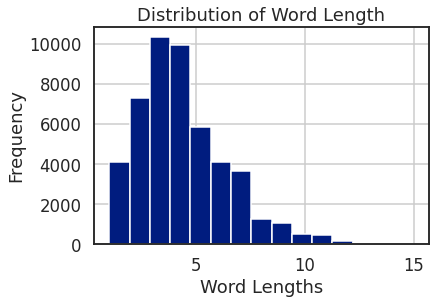

In [ ]:
# Distribuição do tamanho das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

## Mais pré-processamento ##

* Aplicando as seguintes técnicas de pré-processamento:

     * Remova stopwords
     * Faça o reconhecimento de partes do discurso
     * Stemização
     * Lematização

Recomendação: crie uma nova coluna em seu conjunto de dados para cada técnica de pré-processamento que você aplicar, para que possa ver a progressão do texto das revisões.

In [ ]:
# Remove stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop'] = data.tokens.apply(stop_lambda)
data.head()

,user_id,stars,reviews,tokens,tokens_stop
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ..."


In [ ]:
# Parte do discurso
from nltk.tag import pos_tag

pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos'] = (data.tokens_stop.apply(pos_lambda))
data.head()

,user_id,stars,reviews,tokens,tokens_stop,tokens_pos
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."


In [ ]:
# Stemização
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

data['tokens_stem'] = data.tokens_stop.apply(stem_lambda)
data.head()

,user_id,stars,reviews,tokens,tokens_stop,tokens_pos,tokens_stem
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[love, cooki, healthi, tast, great, soft, defi..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[quaker, soft, bake, oatmeal, cooki, raisin, d..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[usual, huge, fan, oatmeal, cooki, liter, melt..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N...","[particip, product, review, includ, sampl, hre..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi...","[kid, love, pleas, give, kid, quick, go, healt..."


In [ ]:
# Lematização
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma'] = data.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])


data.head().T

,0,1,2,3,4
user_id,A368Z46FIKHSEZ,A1JAPP1CXRG57A,A2Z9JNXPIEL2B9,A31CYJQO3FL586,A2KXQ2EKFF3K2G
stars,5,5,5,5,5
reviews,i love these cookies not only are they healt...,quaker soft baked oatmeal cookies with raisins...,i am usually not a huge fan of oatmeal cookies...,i participated in a product review that includ...,my kids loved these i was very pleased to giv...
tokens,"[i, love, these, cookies, not, only, are, they...","[quaker, soft, baked, oatmeal, cookies, with, ...","[i, am, usually, not, a, huge, fan, of, oatmea...","[i, participated, in, a, product, review, that...","[my, kids, loved, these, i, was, very, pleased..."
tokens_stop,"[love, cookies, healthy, taste, great, soft, d...","[quaker, soft, baked, oatmeal, cookies, raisin...","[usually, huge, fan, oatmeal, cookies, literal...","[participated, product, review, included, samp...","[kids, loved, pleased, give, kids, quick, go, ..."
tokens_pos,"[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[(participated, JJ), (product, NN), (review, N...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."
tokens_stem,"[love, cooki, healthi, tast, great, soft, defi...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[particip, product, review, includ, sampl, hre...","[kid, love, pleas, give, kid, quick, go, healt..."
tokens_lemma,"[love, cooky, healthy, taste, great, soft, def...","[quaker, soft, bake, oatmeal, cooky, raisins, ...","[usually, huge, fan, oatmeal, cooky, literally...","[participated, product, review, include, sampl...","[kid, love, pleased, give, kid, quick, go, hea..."


* Depois de passar por essas etapas de pré-processamento, quais são os mais palavras comuns agora? Eles fazem mais sentido?

In [ ]:
# Vamos encontrar as palavras mais comuns após limpar os dados

# Isso cria uma lista enorme, combinando todos os valores de tokens
word_list_clean = sum(data.tokens_stem.tolist(), [])

word_list_clean[:10]

['love',
 'cooki',
 'healthi',
 'tast',
 'great',
 'soft',
 'definit',
 'add',
 'groceri',
 'list']

In [ ]:
from collections import Counter

# Converts list to a dictionary with value counts
word_counts_clean = Counter(word_list_clean)

# Reverse the key/values in the dictionary for sorting
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Sort the list by count
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Prints the 10 most commons words
word_counts_clean[:10]

[(1686, 'cooki'),
 (713, 'soft'),
 (559, 'love'),
 (482, 'oatmeal'),
 (416, 'tast'),
 (378, 'raisin'),
 (366, 'like'),
 (366, 'good'),
 (347, 'quaker'),
 (302, 'tri')]

Essas novas 10 palavras principais fazem muito mais sentido e nos dão uma boa ideia do que trata o corpus. Só de olhar para essas 10 palavras principais, você pode dizer que o corpus lida com deliciosos biscoitos de aveia!

## Análise de sentimentos

Crie um novo conjunto de dados para modelagem com as seguintes colunas:
     - Coluna 1: 'positivo' se revisão = 4 ou 5 e 'negativo' se revisão = 1 ou 2
     - Coluna 2: texto de revisão
* Dê uma olhada no número de avaliações positivas e negativas no conjunto de dados recém-criado.

Use o código de pré-processamento abaixo para limpar os dados das revisões antes de prosseguir para a modelagem.

In [ ]:
import numpy as np

# Remove 3 star reviews
data = data[data.stars!=3]

# Set 4/5 star reviews to positive, the rest to negative
data['sentiment'] = np.where(data['stars'] >= 4, 'positive', 'negative')

# Include only the sentiment and reviews columns
data = data[['sentiment', 'reviews']]
data.head()

,sentiment,reviews
0,positive,i love these cookies not only are they healt...
1,positive,quaker soft baked oatmeal cookies with raisins...
2,positive,i am usually not a huge fan of oatmeal cookies...
3,positive,i participated in a product review that includ...
4,positive,my kids loved these i was very pleased to giv...


In [ ]:
# Note that the dataset has mostly positive reviews
data.sentiment.value_counts(normalize=True)

positive    0.98133
negative    0.01867
Name: sentiment, dtype: float64

Prepare os dados para modelagem:
* Divida os dados em conjuntos de treinamento e teste. Você deve ter quatro conjuntos de dados - X_train, X_test, y_train, y_test

Crie recursos numéricos com Count Vectorizer. Crie duas matrizes de termo de documento:
* Matriz 1: os termos devem ser unigramas (palavras simples) e os valores devem ser contagens de palavras (Dica: este é o padrão do vetorizador de contagem)
* Matriz 2: os termos devem ser unigramas e bigramas, e os valores devem ser valores binários

Recomendação: Utilize a função de palavras irrelevantes do Count Vectorizer para remover palavras irrelevantes do texto de comentários.

In [ ]:
# Split the data into X and y data sets
X = data.reviews
y = data.sentiment

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Number of reviews in the training set
X_train.shape, y_train.shape

((599,), (599,))

In [ ]:
# Number of reviews in the test set
X_test.shape, y_test.shape

((258,), (258,))

In [ ]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

print(X_train_cv1.toarray().shape)

(599, 1818)


In [ ]:
print(X_train_cv1)

  (0, 112)	1
  (0, 116)	1
  (0, 186)	1
  (0, 323)	1
  (0, 325)	1
  (0, 355)	1
  (0, 392)	2
  (0, 506)	1
  (0, 650)	1
  (0, 737)	1
  (0, 886)	1
  (0, 888)	1
  (0, 902)	1
  (0, 934)	1
  (0, 1052)	1
  (0, 1166)	1
  (0, 1248)	1
  (0, 1264)	1
  (0, 1460)	2
  (0, 1549)	1
  (0, 1616)	1
  (0, 1673)	1
  (0, 1707)	1
  (1, 111)	1
  (1, 138)	1
  :	:
  (598, 1052)	3
  (598, 1054)	1
  (598, 1057)	1
  (598, 1095)	1
  (598, 1114)	1
  (598, 1155)	1
  (598, 1210)	1
  (598, 1221)	1
  (598, 1223)	1
  (598, 1248)	1
  (598, 1251)	1
  (598, 1262)	2
  (598, 1264)	1
  (598, 1442)	1
  (598, 1460)	1
  (598, 1516)	1
  (598, 1519)	1
  (598, 1520)	1
  (598, 1551)	1
  (598, 1570)	1
  (598, 1573)	1
  (598, 1632)	1
  (598, 1641)	1
  (598, 1735)	1
  (598, 1754)	1


In [ ]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

print(X_train_cv2.toarray().shape)

(599, 10136)


In [ ]:
print(X_train_cv2)

  (0, 435)	1
  (0, 458)	1
  (0, 481)	1
  (0, 489)	1
  (0, 935)	1
  (0, 936)	1
  (0, 1548)	1
  (0, 1628)	1
  (0, 1776)	1
  (0, 1815)	1
  (0, 2109)	1
  (0, 2115)	1
  (0, 2297)	1
  (0, 2333)	1
  (0, 2363)	1
  (0, 2926)	1
  (0, 2929)	1
  (0, 3656)	1
  (0, 3761)	1
  (0, 4272)	1
  (0, 4274)	1
  (0, 5065)	1
  (0, 5066)	1
  (0, 5069)	1
  (0, 5086)	1
  :	:
  (598, 7258)	1
  (598, 8060)	1
  (598, 8061)	1
  (598, 8199)	1
  (598, 8286)	1
  (598, 8505)	1
  (598, 8506)	1
  (598, 8529)	1
  (598, 8531)	1
  (598, 8532)	1
  (598, 8533)	1
  (598, 8663)	1
  (598, 8664)	1
  (598, 8768)	1
  (598, 8841)	1
  (598, 8874)	1
  (598, 8882)	1
  (598, 9229)	1
  (598, 9230)	1
  (598, 9255)	1
  (598, 9256)	1
  (598, 9742)	1
  (598, 9744)	1
  (598, 9853)	1
  (598, 9854)	1


Use a regressão logística para classificar as avaliações como positivas ou negativas. Faça isso para ambas as matrizes.
* Ajustar um modelo de regressão logística nos dados de treinamento
* Aplique o modelo nos dados de teste e calcule as seguintes métricas de erro: acurácia, precisão, recuperação (recall), pontuação F1
* Opcional: Visualize a matriz de confusão para ambos os modelos
* Compare as métricas de erro das duas matrizes

Recomendação: crie uma função para calcular as métricas de erro, já que você fará isso várias vezes.

In [ ]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [ ]:
# Train the second model
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [ ]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]
    
    a = true_pos + true_neg
    b = true_pos + true_neg + false_pos + false_neg
    print (a/b)
    
    accuracy = round(float((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)),3)
    precision = round(float((true_pos) / (true_pos + false_pos)),3)
    recall = round(float((true_pos) / (true_pos + false_neg)),3)
    f1 = round(float(2 * (precision * recall) / (precision + recall)),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

0.9728682170542635


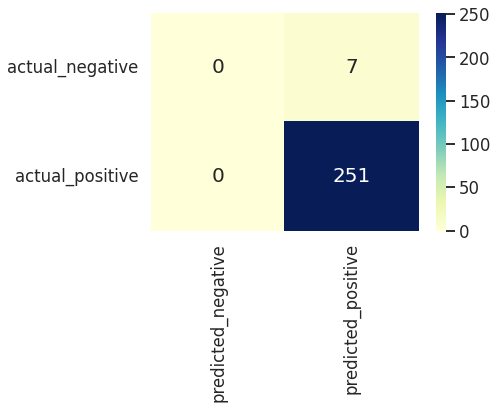

In [ ]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

0.9728682170542635


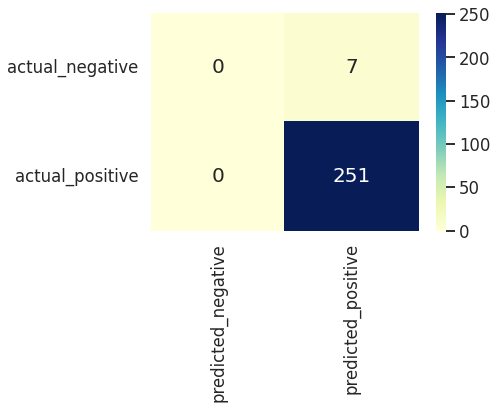

In [ ]:
# The heat map for the second logistic regression model
cm2 = conf_matrix(y_test, y_pred_cv2)

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

,LogReg1,LogReg2
Accuracy,0.973,0.973
Precision,0.973,0.973
Recall,1.000,1.000
F1 Score,0.986,0.986


Vamos tentar usar outra técnica de aprendizado de máquina para classificar essas avaliações como positivas ou negativas. Faça exatamente o mesmo exercício da etapa anterior, mas, desta vez, use Naive Bayes em vez de Regressão logística.

Para dados contínuos, use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). Para dados binários, use [Bernoulli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB).

Compare os resultados.

In [ ]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [ ]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

0.9728682170542635


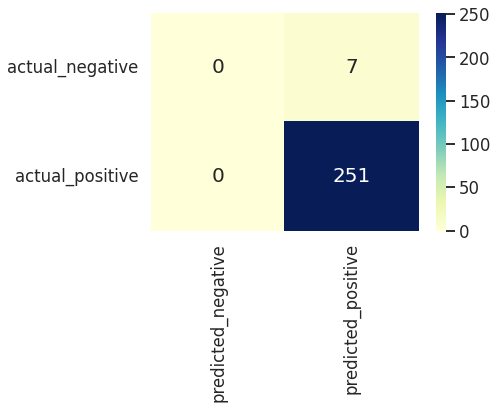

In [ ]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

0.9728682170542635


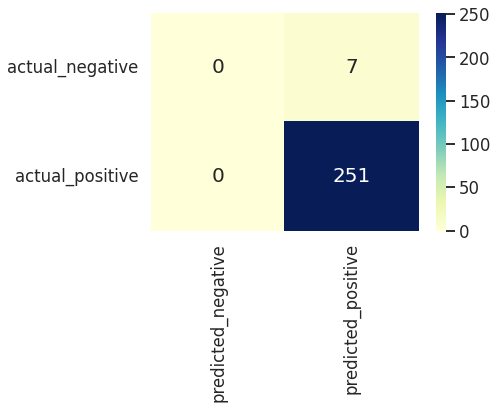

In [ ]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1', 'NB2']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,LogReg2,NB1,NB2
Accuracy,0.973,0.973,0.973,0.973
Precision,0.973,0.973,0.973,0.973
Recall,1.000,1.000,1.000,1.000
F1 Score,0.986,0.986,0.986,0.986


Até este ponto, usamos o Count Vectorizer para criar matrizes de termos de documentos para inserir nos modelos. Para pelo menos um dos quatro modelos que você criou até agora, use TF-IDF Vectorizer em vez de Count Vectorizer e veja se melhora os resultados.

In [ ]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

0.9728682170542635


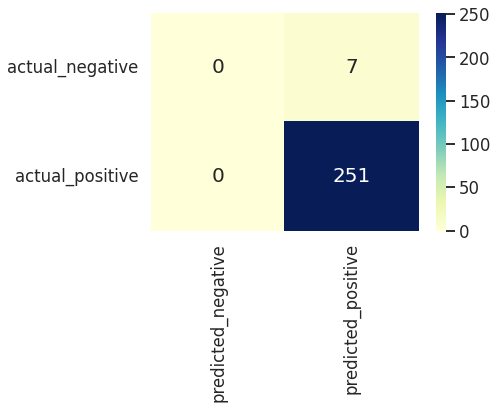

In [ ]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm5 = conf_matrix(y_test, y_pred_tfidf1_lr)

0.9728682170542635


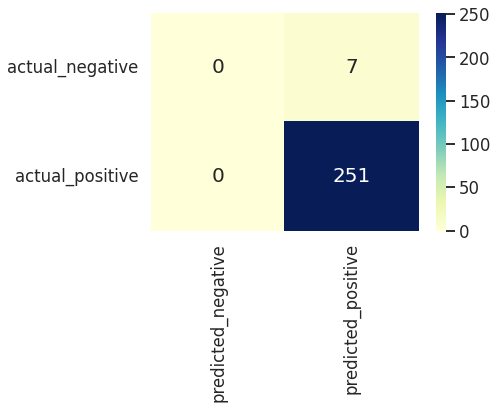

In [ ]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm6 = conf_matrix(y_test, y_pred_tfidf2_lr)

0.9728682170542635


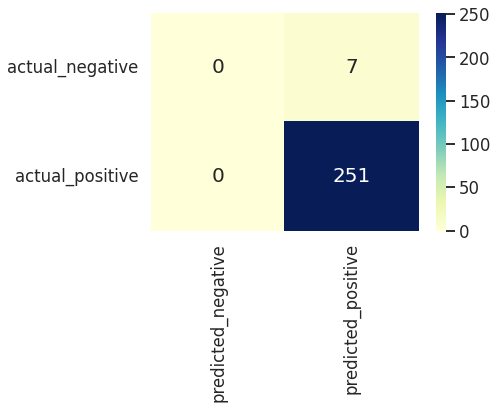

In [ ]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm7 = conf_matrix(y_test, y_pred_tfidf1_nb)

0.9728682170542635


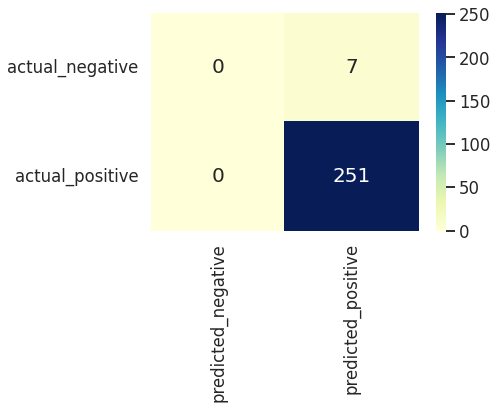

In [ ]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf2)
cm8 = conf_matrix(y_test, y_pred_tfidf2_nb)

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm5, cm6, cm7, cm8)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR1-TFIDF', 'LR2-TFIDF', 'NB1-TFIDF', 'NB2-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LogReg1,LogReg2,NB1,NB2,LR1-TFIDF,LR2-TFIDF,NB1-TFIDF,NB2-TFIDF
Accuracy,0.973,0.973,0.973,0.973,0.973,0.973,0.973,0.973
Precision,0.973,0.973,0.973,0.973,0.973,0.973,0.973,0.973
Recall,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
F1 Score,0.986,0.986,0.986,0.986,0.986,0.986,0.986,0.986


## Exercício

Crie um modelo para análise de sentimentos para [revisões de hoteis](https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews). Considere positivo, as análises com 4 ou 5 estrelas, negativos as demais.